<a href="https://colab.research.google.com/github/renardelyon/Latihan_ML/blob/main/Tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
contoh_df = pd.read_csv('contoh1.csv',sep=';')

In [ ]:
contoh_df

,Volume,Kelerengan,Kerapatan
0,26.027892,0.80,0.90
1,21.051186,0.70,0.90
2,20.587496,0.12,0.90
3,22.121309,0.07,0.75
4,4.571840,0.05,0.50


In [ ]:
import numpy as np

lereng_train = contoh_df['Kelerengan'].to_numpy().astype(float)
lereng_train = np.expand_dims(lereng_train,axis=1)
rapat_train = contoh_df['Kerapatan'].to_numpy().astype(float)
rapat_train = np.expand_dims(rapat_train,axis=1)

train_feature = np.append(lereng_train,rapat_train,axis=1)
train_label =  contoh_df['Volume'].to_numpy().astype(float)



array([26.02789175, 21.05118565, 20.58749557, 22.12130887,  4.57184   ])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


model = Pipeline([('poly',PolynomialFeatures(degree=2)),
                  ('linear',LinearRegression(fit_intercept=False))])

model = model.fit(train_feature,train_label)
weight = model.named_steps['linear'].coef_



In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

prediction = model.predict(train_feature)
mse(y_true=train_label,y_pred=prediction)
r2_score(y_true=train_label,y_pred=prediction)


1.2432447866283146e-28

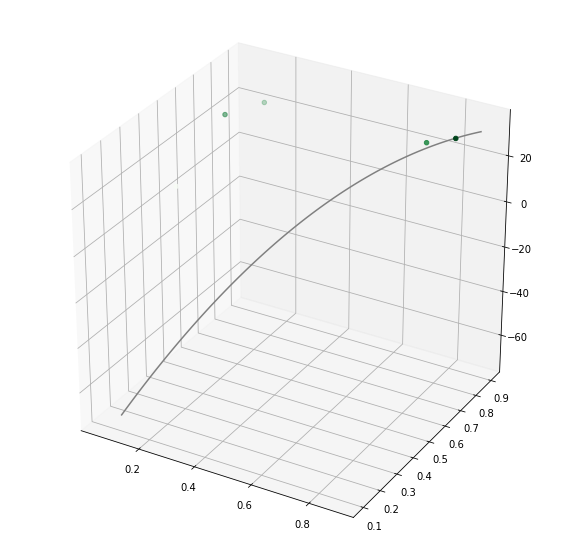

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection = '3d')

x1_data = train_feature[:,0]
x2_data = train_feature[:,1]
ax.scatter3D(x1_data,x2_data,train_label,c=train_label,cmap='Greens')

x1= np.arange(0.1,0.9,0.01)
x2= np.arange(0.1,0.9,0.01)
y = weight[0]+weight[1]*x1+weight[2]*x2+weight[3]*x1*x2+weight[4]*x1**2+weight[5]*x2**2
ax.plot3D(x1,x2,y,'gray')
